In [ ]:
# For Plotting Visc(edot)_conc

visc_tr: -1.75714
visc_tr: 13.6207
visc_tr: 10.2419
visc_tr: 16.5085
visc_tr: 7.28837
visc_tr: 2.59175
visc_tr: 2.60166
visc_tr: 0.912266
visc_tr: 3.40929
visc_tr: 2.65267
visc_tr: 2.31429
visc_tr: 2.27523
visc_tr: 1.77208
visc_tr: 2.13576
visc_tr: 2.34378
visc_tr: 1.24246
visc_tr: 1.56682
visc_tr: 1.39766
visc_tr: 1.6708
visc_tr: 1.49939
visc_tr: 1.34654
visc_tr: 1.09776
visc_tr: 1.30766
visc_tr: 1.30328
visc_tr: 1.21665
visc_tr: 1.08805
visc_tr: 1.0955
visc_tr: 1.08174
visc_tr: 1.12644
visc_tr: 1.10931
Done


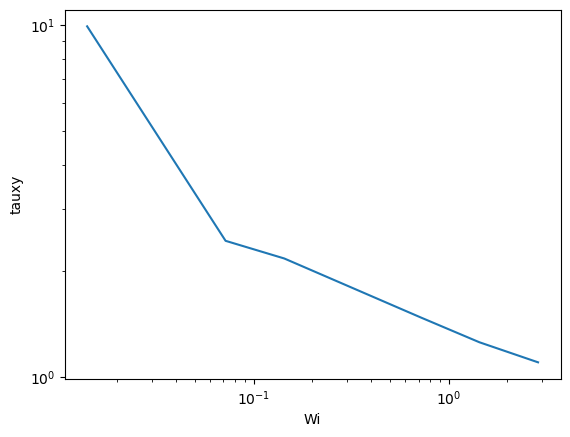

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import csv

Nb = 50
Nc = 10
#conc = np.array([0.005,0.5,2])
conc = np.array([0.5])
box_length = np.array([42.263516])
#box_length = np.array([196.169866,42.263516,26.624347])
Ncharges = 0
barrier = 3
barrier2 = 3
lambda_d = 10
edot = np.array([0.00008]) 
#edot = np.array([0.00008,0.00041,0.00082,0.00410,0.0082,0.01639]) 
#edot = np.array([0.00286,0.00571,0.01143,0.02857])
it = 1
ntr = 5
visc_tr = np.zeros(ntr)
visc_avg = np.zeros(len(edot))
visc_std = np.zeros(len(edot))
# tmax = 4999.5#last timestep in MSD file
# printprops = 1000
# dt = 0.0005
Wi = edot*175
# nsamp = int(tmax/(dt*printprops))

for c in range(0,len(conc)):
    
    for d in range(0,len(edot)):
        shear=edot[d]
        for tr in range(1,ntr+1):

            file_name = "prop/VF" + str(Nb)+ "_" + str(Nc) + "_" + format(conc[c],'.6f') + "_" +format(box_length[c],'.6f') + "_"+ str(Ncharges) + "_" + format(barrier,'.2f') + "_" + format(barrier2,'.2f')+"_"+ format(lambda_d,'.2f')+"_"+ format(edot[d],'.5f')+"_"+str(tr)+"_" +str(it)+".txt"
            #print(file_name)
            
            """
            Extracting data
            """     
            tau_ss = 4000 #Set Steady-state Time (time/printprops)
            my_data = np.loadtxt(file_name,delimiter=' ')
            time = my_data[tau_ss:,0]
            tauxy_data = my_data[tau_ss:,1]
            
            """
            Check for Noise & Steady-State
            """  
            #plt.plot(time,tauxy_data)
            
            "Remove Noise"
            cutoff = 500
            tauxy = np.delete(tauxy_data,np.where(abs(tauxy_data)>cutoff))
            time = np.delete(time,np.where(abs(tauxy_data)>cutoff))
            for i in range(0,len(tauxy)):
                if(abs(tauxy[i])>500):
                    print("i: %g tauxy: %g\n"%(i,tauxy[i]))
            #plt.plot(time,tauxy)
            
            "Calculate Viscosity"
            V = box_length[c]*box_length[c]*box_length[c]
            visc = (6*np.pi*tauxy)/(2*V*shear*conc[c])
            visc_tr[tr-1] = np.average(visc)
            #visc_tr[tr-1] = np.average(tauxy/edot[d])    #test line
            print("visc_tr: %g"%visc_tr[tr-1])
            
        "Average Viscosity thru Trajectories"
        visc_avg[d] = np.average(np.abs(visc_tr))
        visc_std[d] = np.std(visc_tr)
        #print("Shear Viscosity: %g\n"%visc_avg[c])
        
    "Plot Results"
    plt.loglog(Wi,visc_avg)
    plt.xlabel('Wi')
    plt.ylabel('tauxy')

    """
    Output
    """     

#     with open('prop/avgVisc(Wi)_conc_'+format(conc[c],'.6f')+'c_'+'_Nchrg'+str(Ncharges)+"_it"+str(it)+".csv",mode='w') as practice_file:
#         practice = csv.writer(practice_file,delimiter=',')
#         y = ["edot","visc","Err"]
#         practice.writerow(y)
#         for i in range(len(edot)):
#             x = [Wi[i],visc_avg[i],visc_std[i]/np.sqrt(ntr)]
#             practice.writerow(x)
#         #print(x)
            

print("Done")  
            
            
            
            
            
            
            
            

In [53]:
edot

array([8.000e-05, 4.100e-04, 8.200e-04, 4.100e-03, 8.200e-03, 1.639e-02])

In [54]:
visc_avg

array([ 2.3215114 ,  4.50244358,  6.65701202, 24.55494319, 41.68097341,
       70.30056523])

0.7869825803211378

In [20]:
# For Plotting Visc(conc)_edot

prop/VF50_10_0.500000_42.263516_0_3.00_3.00_10.00_0.00820_1_1.txt
prop/VF50_10_0.500000_42.263516_0_3.00_3.00_10.00_0.00820_2_1.txt
prop/VF50_10_0.500000_42.263516_0_3.00_3.00_10.00_0.00820_3_1.txt
prop/VF50_10_0.500000_42.263516_0_3.00_3.00_10.00_0.00820_4_1.txt
prop/VF50_10_0.500000_42.263516_0_3.00_3.00_10.00_0.00820_5_1.txt
prop/VF50_10_0.500000_42.263516_0_3.00_3.00_10.00_0.00820_6_1.txt
prop/VF50_10_0.500000_42.263516_0_3.00_3.00_10.00_0.00820_7_1.txt
prop/VF50_10_0.500000_42.263516_0_3.00_3.00_10.00_0.00820_8_1.txt
prop/VF50_10_0.500000_42.263516_0_3.00_3.00_10.00_0.00820_9_1.txt
prop/VF50_10_0.500000_42.263516_0_3.00_3.00_10.00_0.00820_10_1.txt
prop/VF50_10_0.500000_42.263516_0_3.00_3.00_10.00_0.00820_11_1.txt
prop/VF50_10_0.500000_42.263516_0_3.00_3.00_10.00_0.00820_12_1.txt
prop/VF50_10_0.500000_42.263516_0_3.00_3.00_10.00_0.00820_13_1.txt
prop/VF50_10_0.500000_42.263516_0_3.00_3.00_10.00_0.00820_14_1.txt
prop/VF50_10_0.500000_42.263516_0_3.00_3.00_10.00_0.00820_15_1.txt
Shea

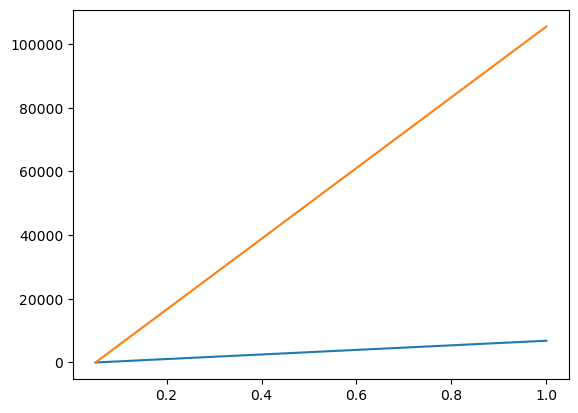

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import csv

Nb = 50
Nc = 10
#conc = np.array([0.005,0.5,2])
conc = np.array([0.5])
box_length = np.array([42.263516])
#box_length = np.array([196.169866,42.263516,26.624347])
Ncharges = 0
barrier = 3
barrier2 = 3
lambda_d = 10
edot = np.array([0.00820,0.00041]) 
#edot = np.array([0.00008,0.00041,0.00082,0.00410,0.00820,0.01639,0.04098,0.08197,0.16393,0.81967,1.63934]) #for 0.5c*
#edot = np.array([0.03704,0.07407,0.14815,0.74074,1.48148]) #for 1c*
#edot = np.array([0.02591,0.05181,0.10363,0.51813,1.03627]) #for 2c*
it = 1
ntr = 15
visc_tr = np.zeros(ntr)
visc_avg = np.zeros(len(conc))
visc_std = np.zeros(len(conc))

Wi = edot*122
# nsamp = int(tmax/(dt*printprops))

for d in range(0,len(edot)):
    for c in range(0,len(conc)):
        for tr in range(1,ntr+1):

            file_name = "prop/VF" + str(Nb)+ "_" + str(Nc) + "_" + format(conc[c],'.6f') + "_" +format(box_length[c],'.6f') + "_"+ str(Ncharges) + "_" + format(barrier,'.2f') + "_" + format(barrier2,'.2f')+"_"+ format(lambda_d,'.2f')+"_"+ format(edot[d],'.5f')+"_"+str(tr)+"_" +str(it)+".txt"
            print(file_name)
            
            """
            Extracting data
            """     
            tau_ss = 100 #Set Steady-state Time
            my_data = np.loadtxt(file_name,delimiter=' ')
            time = my_data[tau_ss:,0]
            tauxy_data = my_data[tau_ss:,1]
            
            """
            Check for Steady-State
            """  
            #plt.plot(time,tauxy_data)
            
            
            "Remove Noise"
            cutoff = 500
            tauxy = np.delete(tauxy_data,np.where(abs(tauxy_data)>cutoff))
            time = np.delete(time,np.where(abs(tauxy_data)>cutoff))
#             for i in range(0,len(tauxy)):
#                 if(abs(tauxy[i])>500):
#                     print("i: %g tauxy: %g\n"%(i,tauxy[i]))
#             print(tauxy)
            #plt.plot(time,tauxy)
           
            "Calculate Viscosity"
            visc = np.abs(tauxy)/edot[d]
#             print(visc)
            visc_tr[tr-1] = np.average(visc)
            #print(visc_tr)
            
        "Average Viscosity thru Trajectories"
        visc_avg[c] = np.average(visc_tr)
        visc_std[c] = np.std(visc_tr)
        print("Shear Viscosity: %g\n"%visc_avg[c])
        
        plt.plot(Wi,visc_avg)

#     """
#     Output
#     """     

#     with open('prop/avgVisc(conc)_Wi_'+'c_'+format(Wi[d],'.3f')+'_Nchrg'+str(Ncharges)+"_it"+str(it)+".csv",mode='w') as practice_file:
#         practice = csv.writer(practice_file,delimiter=',')
#         y = ["conc","visc","Err"]
#         practice.writerow(y)
#         for i in range(len(conc)):
#             x = [conc[i],visc_avg[c],visc_std[c]/np.sqrt(ntr)]
#             practice.writerow(x)
#         #print(x)
            

 
            
            
            
            
            
            
            
            

In [62]:
i_delete = np.where(tauxy>500)

In [63]:
#For Plotting \Psi_1 AND \Psi_2(Wi)_conc 

(array([3555]),)


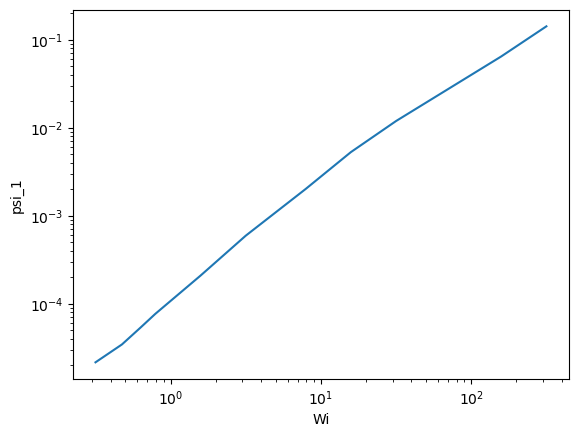

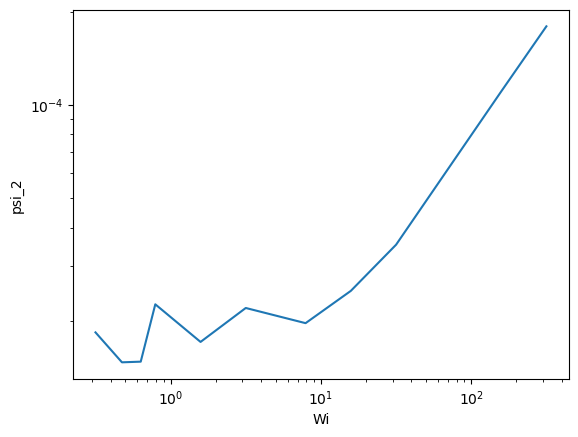

Done


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import csv

Nb = 50
Nc = 10
#conc = np.array([0.005,0.5,2])
conc = np.array([0.5])
box_length = np.array([42.263516])
#box_length = np.array([42.263516,33.544575,26.624347])
Ncharges = 0
barrier = 3
barrier2 = 3
lambda_d = 10
#edot = np.array([0.00155,0.00207]) 
edot = np.array([0.00164,0.00246,0.00328,0.00410,0.00820,0.01639,0.04098,0.08197,0.16393,0.81967,1.63934]) #for 0.5c*
#edot = np.array([0.00148,0.00222,0.00296,0.00370,0.00741,0.01481,0.03704,0.07407,0.14815,0.74074,1.48148]) #for 1c*
#edot = np.array([0.00104,0.00155,0.00207,0.00259,0.00518,0.01036,0.02591,0.05181,0.10363,0.51813,1.03627]) #for 2c*
it = 1
ntr = 14
psi1_tr = np.zeros(ntr)
psi2_tr = np.zeros(ntr)
psi1_avg = np.zeros(len(edot))
psi1_std = np.zeros(len(edot))
psi2_avg = np.zeros(len(edot))
psi2_std = np.zeros(len(edot))
# tmax = 4999.5#last timestep in MSD file
# printprops = 1000
# dt = 0.0005
Wi = edot*193
# nsamp = int(tmax/(dt*printprops))

for c in range(0,len(conc)):
    for d in range(0,len(edot)):
        shear=edot[d]
        #print(shear)
        for tr in range(1,ntr+1):

            file_name = "prop/VF" + str(Nb)+ "_" + str(Nc) + "_" + format(conc[c],'.6f') + "_" +format(box_length[c],'.6f') + "_"+ str(Ncharges) + "_" + format(barrier,'.2f') + "_" + format(barrier2,'.2f')+"_"+ format(lambda_d,'.2f')+"_"+ format(edot[d],'.5f')+"_"+str(tr)+"_" +str(it)+".txt"
            #print(file_name)
            
            """
            Extracting data
            """     
            tau_ss = 100 #Set Steady-state Time (time/printprops)
            my_data = np.loadtxt(file_name,delimiter=' ')
            time = my_data[tau_ss:,0]
            tauxx = my_data[tau_ss:,2]
            tauyy = my_data[tau_ss:,3]
            tauzz = my_data[tau_ss:,4]
            
            """
            Check for Noise & Steady-State
            """  
#             plt.plot(time,tauxx)
#             plt.plot(time,tauyy)
#             plt.plot(time,tauzz)
            
            "Calculate \Psi_1 and \Psi_2"
            
            V = box_length[c]*box_length[c]*box_length[c]
            psi_1 = (tauxx - tauyy)/(2*V*strain*strain)
            psi_2 = (tauyy - tauzz)/(2*V*strain*strain)
            psi1_tr[tr-1] = np.average(psi_1)
            psi2_tr[tr-1] = np.average(psi_2)
            
#             print("psi1_tr: %g"%psi1_tr[tr-1])
#             print("psi2_tr: %g"%psi2_tr[tr-1])
            
        "Average Viscosity thru Trajectories"
        psi1_avg[d] = np.average(np.abs(psi1_tr))
        psi1_std[d] = np.std(psi1_tr)
        psi2_avg[d] = np.average(np.abs(psi2_tr))
        psi2_std[d] = np.std(psi2_tr)
#         print("psi_1: %g"%psi1_avg[d])
#         print("psi_2: %g"%psi2_avg[d])
        
    "Plot Results"
    plt.loglog(Wi,psi1_avg)
    plt.xlabel('Wi')
    plt.ylabel(r'psi_1')
    plt.show()
    
    plt.loglog(Wi,psi2_avg)
    plt.xlabel('Wi')
    plt.ylabel(r'psi_2')
    plt.show()

    """
    Output
    """     

    with open('prop/avgPsi(Wi)_conc_'+format(conc[c],'.2f')+'c_'+"_it"+str(it)+".csv",mode='w') as practice_file:
        practice = csv.writer(practice_file,delimiter=',')
        y = ["Wi","Psi_1","Err","Psi_2","Err"]
        practice.writerow(y)
        for i in range(len(edot)):
            x = [Wi[i],psi1_avg[i],psi1_std[i]/np.sqrt(ntr),psi2_avg[i],psi2_std[i]/np.sqrt(ntr)]
            practice.writerow(x)
        #print(x)
            

print("Done")  
            
            
            
            
            
            
            
            

In [62]:
##<tau_ij> Analysis #####

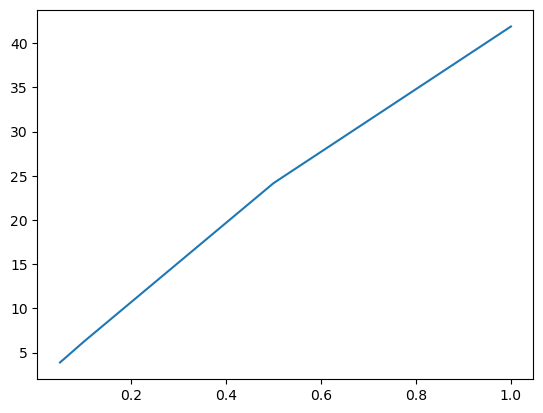

Done


In [71]:
import numpy as np
import matplotlib.pyplot as plt
import csv

Nb = 50
Nc = 10
#conc = np.array([0.005,0.5,2])
conc = np.array([0.5])
box_length = np.array([42.263516])
#box_length = np.array([196.169866,42.263516,26.624347])
Ncharges = 0
barrier = 3
barrier2 = 3
lambda_d = 10
edot = np.array([0.00041,0.00082,0.00410,0.0082]) 
#edot = np.array([0.00008,0.00041,0.00082,0.00410,0.00820,0.01639,0.04098,0.08197,0.16393,0.81967,1.63934]) #for 0.5c*
#edot = np.array([0.03704,0.07407,0.14815,0.74074,1.48148]) #for 1c*
#edot = np.array([0.02591,0.05181,0.10363,0.51813,1.03627]) #for 2c*
it = 1
ntr = 15
tauxy_avg = np.zeros(ntr)
tauxx_avg = np.zeros(ntr)
tauyy_avg = np.zeros(ntr)
tauzz_avg = np.zeros(ntr)

tauxy_avg_tr = np.zeros(len(edot))
tauxx_avg_tr = np.zeros(len(edot))
tauyy_avg_tr = np.zeros(len(edot))
tauzz_avg_tr = np.zeros(len(edot))

psi1_std = np.zeros(len(edot))
psi2_avg = np.zeros(len(edot))
psi2_std = np.zeros(len(edot))
# tmax = 4999.5#last timestep in MSD file
# printprops = 1000
# dt = 0.0005
Wi = edot*122
# nsamp = int(tmax/(dt*printprops))

for c in range(0,len(conc)):
    for d in range(0,len(edot)):
        shear=edot[d]
        for tr in range(1,ntr+1):

            file_name = "prop/VF" + str(Nb)+ "_" + str(Nc) + "_" + format(conc[c],'.6f') + "_" +format(box_length[c],'.6f') + "_"+ str(Ncharges) + "_" + format(barrier,'.2f') + "_" + format(barrier2,'.2f')+"_"+ format(lambda_d,'.2f')+"_"+ format(edot[d],'.5f')+"_"+str(tr)+"_" +str(it)+".txt"
            #print(file_name)
            
            """
            Extracting data
            """     
            tau_ss = 100 #Set Steady-state Time (time/printprops)
            my_data = np.loadtxt(file_name,delimiter=' ')
            time = my_data[tau_ss:,0]
            tauxy = my_data[tau_ss:,1]
            tauxx = my_data[tau_ss:,2]
            tauyy = my_data[tau_ss:,3]
            tauzz = my_data[tau_ss:,4]
            
            """
            Check for Noise & Steady-State
            """  
#             plt.plot(time,tauxy)
#             plt.plot(time,tauxx)
#             plt.plot(time,tauyy)
#             plt.plot(time,tauzz)
            
            "Calculate <tau_ij> for each trajectory"
            tauxy_avg[tr-1] = np.mean(tauxy)
            tauxx_avg[tr-1] = np.mean(tauxx)
            tauyy_avg[tr-1] = np.mean(tauyy)
            tauzz_avg[tr-1] = np.mean(tauzz)
            
#             print("Wi: %g <tauxy>: %g" % (Wi[d],tauxy_avg))
#             print("Wi: %g <tauxx>: %g" % (Wi[d],tauxx_avg))
#             print("Wi: %g <tauyy>: %g" % (Wi[d],tauyy_avg))
#             print("Wi: %g <tauzz>: %g" % (Wi[d],tauzz_avg))
            
            
        "Average <tau_ij> thru Trajectories"
        tauxy_avg_tr[d] = np.average(tauxy_avg)
        tauxx_avg_tr[d] = np.average(tauxx_avg)
        tauyy_avg_tr[d] = np.average(tauyy_avg)
        tauzz_avg_tr[d] = np.average(tauzz_avg)

        
    "Plot Results"
    plt.plot(Wi,tauxy_avg_tr)
    plt.ylabel("tauxy")
    plt.show()
    

    """
    Output
    """     

#     with open('prop/avgVisc(Wi)_conc_'+format(conc[c],'.6f')+'c_'+'_Nchrg'+str(Ncharges)+"_it"+str(it)+".csv",mode='w') as practice_file:
#         practice = csv.writer(practice_file,delimiter=',')
#         y = ["edot","visc","Err"]
#         practice.writerow(y)
#         for i in range(len(edot)):
#             x = [Wi[i],visc_avg[i],visc_std[i]/np.sqrt(ntr)]
#             practice.writerow(x)
#         #print(x)
            

print("Done")  
            
            
            
            
            
            
            
            

In [8]:
np.pi

3.141592653589793

In [32]:
{'L': 1, 'R': array([ 0.6525125 ,  0.75411864,  0.40556725])}

NameError: name 'array' is not defined